## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [5]:
X_data = data.drop(['target'], axis=1)

In [6]:
X_data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

X_train.shape
X_test.shape
print(X_train)

[[ 3.58663321e-01 -6.27704002e-01  1.13639313e+00  3.00024267e-01
  -6.27704002e-01  4.07223826e-01 -5.05432967e-02]
 [ 4.54202458e-02 -1.46744180e+00  5.81716801e-01 -1.24864784e-02
  -1.46744180e+00  5.89939855e-02  1.38043580e-01]
 [-1.05093052e+00  6.31902691e-01 -8.74308565e-01 -1.01838044e+00
   6.31902691e-01 -1.02210899e+00 -1.67303624e+00]
 [ 5.15284858e-01  1.89150938e+00 -1.15164673e+00  4.60465051e-01
   1.89150938e+00  2.75381999e-01 -8.36756163e-01]
 [ 1.76825716e+00 -4.17769553e-01  1.20572767e+00  1.84444121e+00
  -4.17769553e-01  1.80558428e+00  1.08190246e+00]
 [ 1.14177101e+00 -1.88731069e+00  1.13639313e+00  1.13013093e+00
  -1.88731069e+00  1.15432751e+00  5.61001444e-01]
 [-7.37687441e-01  1.05177159e+00 -1.01297765e+00 -7.44933538e-01
   1.05177159e+00 -7.92746068e-01 -7.35054120e-01]
 [ 3.58663321e-01  2.73124718e+00 -9.43643106e-01  3.00024267e-01
   2.73124718e+00  1.56096537e-01 -1.44650062e-01]
 [ 1.29839254e+00  4.21968242e-01  1.27506221e+00  1.30452309e+0

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# TASK 1

In [8]:
X_data_corr = X_data.corr()
print(X_data_corr)


                  x         y         z       x*x       2*y  2*z+3*x*x  \
x          1.000000 -0.205926  0.812458  0.997947 -0.205926   0.996252   
y         -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
z          0.812458 -0.602663  1.000000  0.807137 -0.602663   0.847163   
x*x        0.997947 -0.209289  0.807137  1.000000 -0.209289   0.997457   
2*y       -0.205926  1.000000 -0.602663 -0.209289  1.000000  -0.261123   
2*z+3*x*x  0.996252 -0.261123  0.847163  0.997457 -0.261123   1.000000   
w          0.583277 -0.401790  0.674486  0.583803 -0.401790   0.606860   

                  w  
x          0.583277  
y         -0.401790  
z          0.674486  
x*x        0.583803  
2*y       -0.401790  
2*z+3*x*x  0.606860  
w          1.000000  


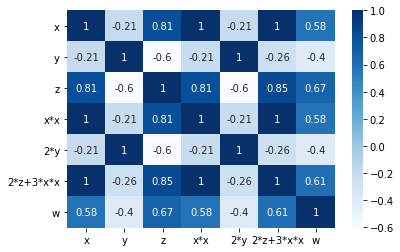

In [9]:
import seaborn as sns    

#annot -If True, write the data value in each cell
sns.heatmap(X_data_corr, annot=True,cmap='Blues')


In [65]:
from sklearn.model_selection import GridSearchCV


model_lr = SGDClassifier(loss='log', penalty='l2', tol=1e-3,verbose=2)

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}
# alphas = [0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
# log_alphas =[]

# for a in tqdm(alphas):
#     b = math.log(a)
#     log_alphas.append(b)

clf = GridSearchCV(model_lr, parameters, cv= 3, scoring='neg_log_loss',return_train_score=True,verbose=2)

clf.fit(X_train,y_train)
#converting the clf.cv_results to dataframe

results = pd.DataFrame.from_dict(clf.cv_results_)

print(clf.best_params_) 
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']
results.head(10)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] alpha=1e-05 .....................................................
-- Epoch 1
Norm: 75.06, NNZs: 7, Bias: -8.828554, T: 44, Avg. loss: 1.410734
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 74.48, NNZs: 7, Bias: -8.828554, T: 88, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 73.91, NNZs: 7, Bias: -8.828554, T: 132, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 73.35, NNZs: 7, Bias: -8.828554, T: 176, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 72.80, NNZs: 7, Bias: -8.828554, T: 220, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 72.25, NNZs: 7, Bias: -8.828554, T: 264, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 71.72, NNZs: 7, Bias: -8.828554, T: 308, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
[CV] .............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001661,4.699094e-04,0.000333,4.706960e-04,1e-05,{'alpha': 1e-05},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001329,4.704150e-04,0.000000,0.000000e+00,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001662,4.699672e-04,0.000000,0.000000e+00,0.001,{'alpha': 0.001},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000997,1.946680e-07,0.000998,7.018853e-07,0.01,{'alpha': 0.01},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000997,5.840039e-07,0.000997,2.973602e-07,0.1,{'alpha': 0.1},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.001662,4.704714e-04,0.000332,4.701340e-04,0.5,{'alpha': 0.5},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.000998,1.946680e-07,0.000000,0.000000e+00,0.8,{'alpha': 0.8},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.001330,4.701903e-04,0.000000,0.000000e+00,1,{'alpha': 1},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.004322,4.016696e-03,0.000333,4.706960e-04,10,{'alpha': 10},0.652174,0.545455,0.727273,0.641634,0.074600,9,0.613636,0.488889,0.577778,0.560101,0.052439
9,0.001330,4.701903e-04,0.000000,0.000000e+00,100,{'alpha': 100},0.521739,0.500000,0.500000,0.507246,0.010248,10,0.500000,0.488889,0.511111,0.500000,0.009072


In [9]:
best_model = SGDClassifier(alpha =0.0001,loss='log', penalty='l2', tol=1e-3,verbose=2)
best_model.fit(X_train,y_train)

-- Epoch 1
Norm: 10.12, NNZs: 7, Bias: 3.879502, T: 67, Avg. loss: 0.012080
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.64, NNZs: 7, Bias: 3.758121, T: 134, Avg. loss: 0.000201
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.23, NNZs: 7, Bias: 3.635210, T: 201, Avg. loss: 0.000218
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8.87, NNZs: 7, Bias: 3.513161, T: 268, Avg. loss: 0.000231
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 8.54, NNZs: 7, Bias: 3.406470, T: 335, Avg. loss: 0.000212
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 8.25, NNZs: 7, Bias: 3.302179, T: 402, Avg. loss: 0.000218
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.99, NNZs: 7, Bias: 3.197669, T: 469, Avg. loss: 0.000232
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


SGDClassifier(loss='log', verbose=2)

In [10]:
best_model.coef_

array([[ 1.77860012, -3.50736516,  4.96011811,  1.49060731, -3.50736516,
         1.9404062 ,  2.34182637]])

In [11]:
y_pred = best_model.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.94      1.00      0.97        17

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [12]:
X_train_edited = X_train+0.01

In [13]:
best_model_edited = SGDClassifier(alpha =0.0001,loss='log', penalty='l2', tol=1e-3,verbose=2)
best_model_edited.fit(X_train_edited,y_train)

-- Epoch 1
Norm: 29.06, NNZs: 7, Bias: 1.261129, T: 67, Avg. loss: 0.078709
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 36.78, NNZs: 7, Bias: -7.566324, T: 134, Avg. loss: 0.058683
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.85, NNZs: 7, Bias: -7.145901, T: 201, Avg. loss: 0.000748
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 33.08, NNZs: 7, Bias: -6.942529, T: 268, Avg. loss: 0.000388
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 31.47, NNZs: 7, Bias: -6.787929, T: 335, Avg. loss: 0.000309
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 30.01, NNZs: 7, Bias: -6.670504, T: 402, Avg. loss: 0.000241
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 28.69, NNZs: 7, Bias: -6.537599, T: 469, Avg. loss: 0.000290
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 27.47, NNZs: 7, Bias: -6.443755, T: 536, Avg. loss: 0.000207
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds


SGDClassifier(loss='log', verbose=2)

In [14]:
best_model_edited.coef_

array([[10.18409746, -9.536426  , 15.18306943,  9.10813592, -9.536426  ,
        10.03144904,  7.40326672]])

In [15]:
y_pred = best_model_edited.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



f1 score difference between two models is 0.03

In [57]:
#As there are collinear features were there,even after adding a slight noise ,weight vectors drastically changed.

Weight_Vector_Difference = abs(100*((best_model_edited.coef_- best_model.coef_)/(best_model_edited.coef_)))
print(Weight_Vector_Difference)
print(Weight_Vector_Difference.shape)
Weight_Vector_Difference_f = Weight_Vector_Difference.flatten()
print(Weight_Vector_Difference_f.shape)


[[82.53551549 63.22138755 67.33125581 83.63433171 63.22138755 80.65677058
  68.3676617 ]]
(1, 7)
(7,)
(7, 1)


In [56]:
indices = np.argsort(Weight_Vector_Difference_f)[::-1][0:4]
print(indices)
print(data.columns[indices])


[3 0 5 6]
Index(['x*x', 'x', '2*z+3*x*x', 'w'], dtype='object')


# TASK 2

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hinge_loss

model_svm = SGDClassifier(loss='hinge',penalty='l2', tol=1e-3, verbose=2)

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}
# alphas = [0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
# log_alphas =[]

# for a in tqdm(alphas):
#     b = math.log(a)
#     log_alphas.append(b)

clf_svm = GridSearchCV(model_svm, parameters, cv= 3, scoring='accuracy',return_train_score=True,verbose=2)

clf_svm.fit(X_train,y_train)
#converting the clf.cv_results to dataframe

results_svm = pd.DataFrame.from_dict(clf_svm.cv_results_)

print(clf_svm.best_params_) 
train_auc_svm= clf_svm.cv_results_['mean_train_score']
train_auc_std_svm= clf_svm.cv_results_['std_train_score']
cv_auc_svm = clf_svm.cv_results_['mean_test_score'] 
cv_auc_std_svm= clf_svm.cv_results_['std_test_score']
results.head(10)



Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] alpha=1e-05 .....................................................
-- Epoch 1
Norm: 68.72, NNZs: 7, Bias: 17.650794, T: 44, Avg. loss: 0.698630
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 68.19, NNZs: 7, Bias: 17.650794, T: 88, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 67.67, NNZs: 7, Bias: 17.650794, T: 132, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 67.16, NNZs: 7, Bias: 17.650794, T: 176, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 66.65, NNZs: 7, Bias: 17.650794, T: 220, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 66.15, NNZs: 7, Bias: 17.650794, T: 264, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 65.66, NNZs: 7, Bias: 17.650794, T: 308, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
[CV] .............................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.001661,4.699094e-04,0.000333,4.706960e-04,1e-05,{'alpha': 1e-05},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001329,4.704150e-04,0.000000,0.000000e+00,0.0001,{'alpha': 0.0001},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001662,4.699672e-04,0.000000,0.000000e+00,0.001,{'alpha': 0.001},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.000997,1.946680e-07,0.000998,7.018853e-07,0.01,{'alpha': 0.01},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000997,5.840039e-07,0.000997,2.973602e-07,0.1,{'alpha': 0.1},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.001662,4.704714e-04,0.000332,4.701340e-04,0.5,{'alpha': 0.5},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.000998,1.946680e-07,0.000000,0.000000e+00,0.8,{'alpha': 0.8},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.001330,4.701903e-04,0.000000,0.000000e+00,1,{'alpha': 1},1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.004322,4.016696e-03,0.000333,4.706960e-04,10,{'alpha': 10},0.652174,0.545455,0.727273,0.641634,0.074600,9,0.613636,0.488889,0.577778,0.560101,0.052439
9,0.001330,4.701903e-04,0.000000,0.000000e+00,100,{'alpha': 100},0.521739,0.500000,0.500000,0.507246,0.010248,10,0.500000,0.488889,0.511111,0.500000,0.009072


In [84]:
best_model_svm = SGDClassifier(eta0=0.0001,alpha =0.00001,loss='hinge', penalty='l2', tol=1e-3,verbose=2,learning_rate='constant')
best_model_svm.fit(X_train,y_train)

-- Epoch 1
Norm: 0.01, NNZs: 7, Bias: -0.000100, T: 67, Avg. loss: 0.987913
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 7, Bias: -0.000200, T: 134, Avg. loss: 0.962970
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 7, Bias: -0.000300, T: 201, Avg. loss: 0.938027
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 7, Bias: -0.000400, T: 268, Avg. loss: 0.913083
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 7, Bias: -0.000500, T: 335, Avg. loss: 0.888140
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 7, Bias: -0.000600, T: 402, Avg. loss: 0.863197
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.09, NNZs: 7, Bias: -0.000700, T: 469, Avg. loss: 0.838254
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 7, Bias: -0.000800, T: 536, Avg. loss: 0.813311
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.12, NNZs: 7, Bias: -0.000900, T: 603, Avg. loss: 0.788368
Total training time: 0.00 se

SGDClassifier(alpha=1e-05, eta0=0.0001, learning_rate='constant', verbose=2)

In [85]:
best_model_svm.coef_

array([[ 0.19546449, -0.27204053,  0.37084126,  0.18892426, -0.27204053,
         0.21480606,  0.19181447]])

In [86]:
y_pred = best_model_svm.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [93]:
X_train_edited_svm = X_train+0.01

In [94]:
best_model_edited_svm = SGDClassifier(eta0=0.0001,alpha =0.00001,loss='hinge', penalty='l2', tol=1e-3,verbose=2,learning_rate='constant')
best_model_edited_svm.fit(X_train_edited_svm,y_train)

-- Epoch 1
Norm: 0.01, NNZs: 7, Bias: -0.000100, T: 67, Avg. loss: 0.987915
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 7, Bias: -0.000200, T: 134, Avg. loss: 0.962976
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 7, Bias: -0.000300, T: 201, Avg. loss: 0.938037
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 7, Bias: -0.000400, T: 268, Avg. loss: 0.913098
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 7, Bias: -0.000500, T: 335, Avg. loss: 0.888160
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 7, Bias: -0.000600, T: 402, Avg. loss: 0.863221
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.09, NNZs: 7, Bias: -0.000700, T: 469, Avg. loss: 0.838282
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 7, Bias: -0.000800, T: 536, Avg. loss: 0.813343
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.12, NNZs: 7, Bias: -0.000900, T: 603, Avg. loss: 0.788404
Total training time: 0.00 se

SGDClassifier(alpha=1e-05, eta0=0.0001, learning_rate='constant', verbose=2)

In [95]:
best_model_edited_svm.coef_

array([[ 0.19593143, -0.2718675 ,  0.37134189,  0.1893914 , -0.2718675 ,
         0.21528195,  0.19169079]])

In [97]:
y_pred = best_model_edited_svm.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Accuracy Difference is zero

In [98]:
#As there are collinear features were there,even after adding a slight noise ,weight vectors drastically changed.

Weight_Vector_Difference_svm = abs(100*((best_model_edited_svm.coef_- best_model_svm.coef_)/(best_model_edited_svm.coef_)))
print(Weight_Vector_Difference_svm)
print(Weight_Vector_Difference_svm.shape)
Weight_Vector_Difference_f_svm = Weight_Vector_Difference.flatten()
print(Weight_Vector_Difference_f_svm.shape)


[[0.23832067 0.06364541 0.13481605 0.24665102 0.06364541 0.22105457
  0.06452142]]
(1, 7)
(7,)


In [99]:
indices_svm = np.argsort(Weight_Vector_Difference_f_svm)[::-1][0:4]
print(indices_svm)
print(data.columns[indices_svm])


[6 2 4 1]
Index(['w', 'z', '2*y', 'y'], dtype='object')
